# contango & backwardation

future price 계산 공식:

$$F(t, T) = S(t) e^{c(T-t)}$$

F(t,T): 시점 t에서의 선물 가격    
S(t): 현재 자산 가격  
$e^{c(T−t)}$: 연속 복리로 증가하는 비용. e는 자연로그의 밑이며, 연속적인 복리 계산을 나타냅니다.   
c: 자산을 보유하는 비용 또는 이자율    
T−t: 미래 시점 𝑇와 현재 시점 𝑡 사이의 시간 차이 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

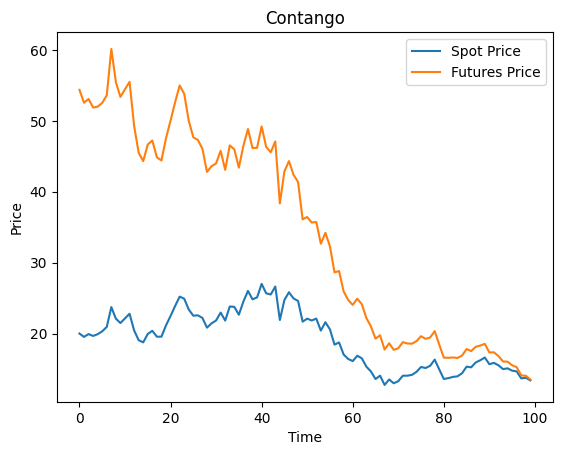

In [3]:
# Contango(콘탱고)를 보여주기 위한 예시 모델입니다.
# 콘탱고는 선물 가격이 미래의 만기일에 가까워질수록 하락하는 현상을 의미합니다.

N = 100  # 잔존 만기일(100일로 설정)
cost_of_carry = 0.01  # 보유 금융 비용 (cost of carry), 즉 자산 보유 비용을 1%로 설정

# Spot Price(현물 가격)와 Futures Price(선물 가격)를 저장할 시리즈를 생성합니다.
# 현물 가격과 선물 가격의 초기값은 1로 설정합니다.
spot_price = pd.Series(np.ones(N), name="Spot Price")
futures_price = pd.Series(np.ones(N), name="Futures Price")

# 첫 번째 시점의 현물 가격을 20으로 설정합니다.
spot_price[0] = 20

# 첫 번째 시점의 선물 가격을 현물 가격과 보유 비용을 고려하여 계산합니다.
# 선물 가격 = 현물 가격 * exp(보유 비용 * 만기일까지 남은 시간)
futures_price[0] = spot_price[0] * np.exp(cost_of_carry * N)

# 1일부터 N일까지의 현물 가격과 선물 가격을 계산합니다.
for n in range(1, N):
    # 현물 가격은 이전 가격에 랜덤하게 변동성을 추가하여 설정 (랜덤 노이즈 사용)
    spot_price[n] = spot_price[n-1] * (1 + np.random.normal(0, 0.05))
    
    # 선물 가격은 매 시점마다 보유 금융 비용을 고려하여 다시 계산
    # 선물 가격 = 현물 가격 * exp(보유 비용 * (잔존 만기일))
    futures_price[n] = spot_price[n] * np.exp(cost_of_carry * (N-n))

# 현물 가격과 선물 가격을 각각 시각화
spot_price.plot()
futures_price.plot()

plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Contango')
plt.show()

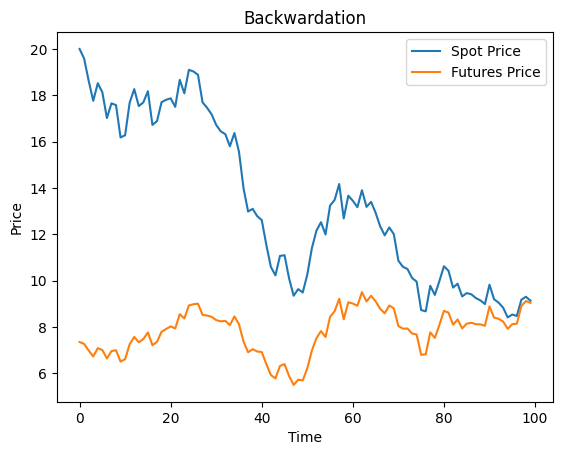

In [4]:
# Backwardation(백워데이션)을 보여주기 위한 예시 모델입니다.
# 백워데이션은 선물 가격이 만기일에 가까워질수록 현물 가격보다 낮아지는 현상을 의미합니다.

N = 100  # 잔존 만기일(100일로 설정)
cost_of_carry = -0.01  # 보유 비용이 음수로 설정되어 백워데이션 현상을 나타냄

# Spot Price(현물 가격)과 Futures Price(선물 가격)를 저장할 시리즈를 생성합니다.
# 현물 가격과 선물 가격의 초기값은 1로 설정합니다.
spot_price = pd.Series(np.ones(N), name="Spot Price")
futures_price = pd.Series(np.ones(N), name="Futures Price")

# 첫 번째 시점의 현물 가격을 20으로 설정합니다.
spot_price[0] = 20

# 첫 번째 시점의 선물 가격을 현물 가격과 보유 비용을 고려하여 계산합니다.
# 선물 가격 = 현물 가격 * exp(보유 비용 * 만기일까지 남은 시간)
futures_price[0] = spot_price[0] * np.exp(cost_of_carry * N)

# 1일부터 N일까지의 현물 가격과 선물 가격을 계산합니다.
for n in range(1, N):
    # 현물 가격은 이전 가격에 랜덤하게 변동성을 추가하여 설정 (랜덤 노이즈 사용)
    spot_price[n] = spot_price[n-1] * (1 + np.random.normal(0, 0.05))
    
    # 선물 가격은 매 시점마다 보유 금융 비용을 고려하여 다시 계산
    # 선물 가격 = 현물 가격 * exp(보유 비용 * (잔존 만기일))
    futures_price[n] = spot_price[n] * np.exp(cost_of_carry * (N-n))

# 현물 가격과 선물 가격을 각각 시각화
spot_price.plot()
futures_price.plot()

plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Backwardation')
plt.show()

### 각 상황에서 취할 수 있는 전략

| 상황        | 취할 수 있는 전략      | 설명                                                        |
|-------------|------------------------|-------------------------------------------------------------|
| **콘탱고**  | 숏 포지션(매도)         | 선물 가격이 현물 가격에 수렴하면서 하락할 때 수익을 기대    |
|             | 캐리 트레이드           | 현물 자산 매수 + 선물 매도 가격 차이를 이용하여 수익 창출    |
| **백워데이션** | 롱 포지션(매수)         | 선물 가격이 현물 가격에 수렴하면서 상승할 때 수익을 기대    |
|             | 스프레드 거래           | 현물 매도 + 선물 매수로 가격 차이를 이용하여 수익 창출      |